# Análises exploratórias

Este notebook explora o perfil de alunos em relação ao churn (evasão) utilizando um conjunto de ~17.000 registros. O objetivo é entender como diferentes variáveis estão relacionadas com a saída de alunos (churn = 1 indica que o aluno evadiu, enquanto churn = 0 indica que permaneceu). Usaremos Pandas para manipulação de dados e Matplotlib/Seaborn para criar visualizações, com análises estatísticas básicas acompanhando os gráficos quando apropriado. As visualizações a seguir incluem distribuições da idade por churn, comparações de taxas de churn entre categorias (faixa etária, forma de pagamento, estado, situação contratual, acesso ao portal, pendência documental, tempo até primeiro acesso, status do cliente, curso), além de gráficos de dispersão para variáveis numéricas (% do curso concluído e parcelas vencidas) diferenciando churn. Cada gráfico está em uma célula separada, formatado para execução seqüencial em um Jupyter Notebook.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo gráfico
sns.set_style('whitegrid')

# Caminho para o arquivo CSV processado
file_path = '../data/processed/atendimentos_de_alunos_processado.csv'

# Carregamento dos dados
try:
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    print(f"✅ Arquivo carregado com sucesso! Total de registros: {len(df)}")
except FileNotFoundError:
    print(f"❌ ERRO: Arquivo não encontrado em '{file_path}'.")
    df = pd.DataFrame()  # cria um DataFrame vazio para evitar erros em execuções futuras
except Exception as e:
    print(f"❌ ERRO ao carregar o arquivo: {e}")
    df = pd.DataFrame()

# Verificação rápida
if not df.empty:
    print("\n📋 Colunas disponíveis no DataFrame:")
    print(df.columns.tolist())

    # Exibe contagem e percentual de churn
    if 'churn' in df.columns:
        churn_counts = df['churn'].value_counts()
        churn_perc = df['churn'].value_counts(normalize=True) * 100
        print("\n📊 Distribuição da variável 'churn':")
        display(pd.DataFrame({
            'Contagem': churn_counts,
            'Porcentagem (%)': churn_perc.round(2)
        }))
else:
    print("⚠️ DataFrame está vazio. Verifique o caminho do arquivo ou o conteúdo do CSV.")


✅ Arquivo carregado com sucesso! Total de registros: 17011

📋 Colunas disponíveis no DataFrame:
['Grupo % Cursado', 'Grupo_Acesso', 'MATRICULAID', '1º NOME', 'DATAMATRICULA', 'ENCERRAMENTO_CONTRATO', 'NOME CURSO PADRÃO', 'Situação Contrato', 'Documentos Pessoais Pendentes', 'Status_Cliente', 'PercentualConclusao', 'DisciplinasAprovadas', 'DisciplinasTotais', 'Data de nascimento', '# parcelas Vencidas', '% Docs Pessoais', 'fezPrimeiroAcesso', 'Forma de Pagamento Oficial', 'ESTADO', 'Total _Atendimentos', 'Acesso ao Portal', 'Anexar Documentos', 'Apoio Pedagogico', 'Bot de Atendimento', 'Contato Via Ligação', 'Correção - Plataforma', 'Correção cadastral', 'Diploma', 'Disparos', 'Duvidas Gerais', 'Erro', 'Estágio', 'Financeiro', 'Informações Comercias', 'Onboarding', 'Outros Atendimentos', 'Ouvidoria', 'Problema Técnico', 'Processos Secretaria', 'Reclame aqui', 'Rematrícula', 'Retenção', 'Solicitação de documentos', 'Suporte de Acesso', 'Suporte Pedagogico', 'has_contact', 'DATAMATRICULA_

,Contagem,Porcentagem (%)
churn,,
1,9323,54.81
0,7688,45.19


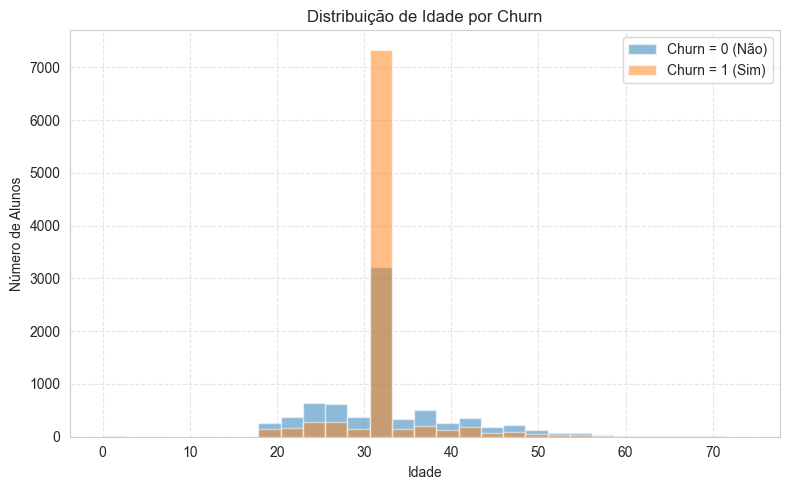

Média de idade - Churn 0 (Não Evadiu): 32.7 anos
Média de idade - Churn 1 (Evadiu):     32.2 anos


In [10]:
# Se ainda não padronizou os nomes das colunas, rode esta linha:
df.columns = df.columns.str.strip().str.lower()

# Agora a coluna será acessada como 'idade' e 'churn'
plt.figure(figsize=(8,5))

min_idade = df['idade'].min()
max_idade = df['idade'].max()
bins = np.linspace(min_idade, max_idade, 30)

plt.hist(df[df['churn'] == 0]['idade'], bins=bins, alpha=0.5, label='Churn = 0 (Não)')
plt.hist(df[df['churn'] == 1]['idade'], bins=bins, alpha=0.5, label='Churn = 1 (Sim)')

plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.title('Distribuição de Idade por Churn')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Estatísticas adicionais
media_idade = df.groupby('churn')['idade'].mean()
print(f"Média de idade - Churn 0 (Não Evadiu): {media_idade[0]:.1f} anos")
print(f"Média de idade - Churn 1 (Evadiu):     {media_idade[1]:.1f} anos")


C:\Users\arthu\AppData\Local\Temp\ipykernel_18928\2103576442.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['churn'] == 0]['idade'], label='Churn=0 (Não)', shade=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_18928\2103576442.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['churn'] == 1]['idade'], label='Churn=1 (Sim)', shade=True)


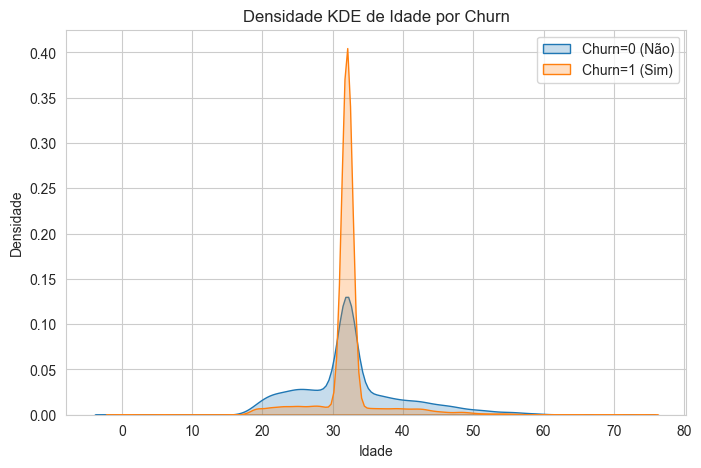

Mediana de idade (churn=0): 32 anos
Mediana de idade (churn=1): 32 anos


In [11]:
# Densidade Kernel (KDE) da distribuição de idades por churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['churn'] == 0]['idade'], label='Churn=0 (Não)', shade=True)
sns.kdeplot(data=df[df['churn'] == 1]['idade'], label='Churn=1 (Sim)', shade=True)
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Densidade KDE de Idade por Churn')
plt.legend()
plt.show()

# Mediana da idade por churn
median_idade = df.groupby('churn')['idade'].median()
print(f"Mediana de idade (churn=0): {median_idade[0]:.0f} anos")
print(f"Mediana de idade (churn=1): {median_idade[1]:.0f} anos")


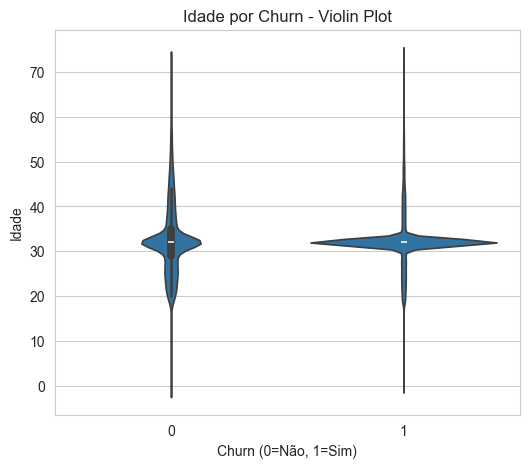

Mediana de idade (churn=0): 32 anos
Mediana de idade (churn=1): 32 anos


In [12]:
# Gráfico de violino da idade por churn
plt.figure(figsize=(6,5))
sns.violinplot(x='churn', y='idade', data=df)
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.ylabel('Idade')
plt.title('Idade por Churn - Violin Plot')
plt.show()

# Mediana de idade por churn
median_idade = df.groupby('churn')['idade'].median()
print(f"Mediana de idade (churn=0): {median_idade[0]:.0f} anos")
print(f"Mediana de idade (churn=1): {median_idade[1]:.0f} anos")


C:\Users\arthu\AppData\Local\Temp\ipykernel_18928\45974456.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


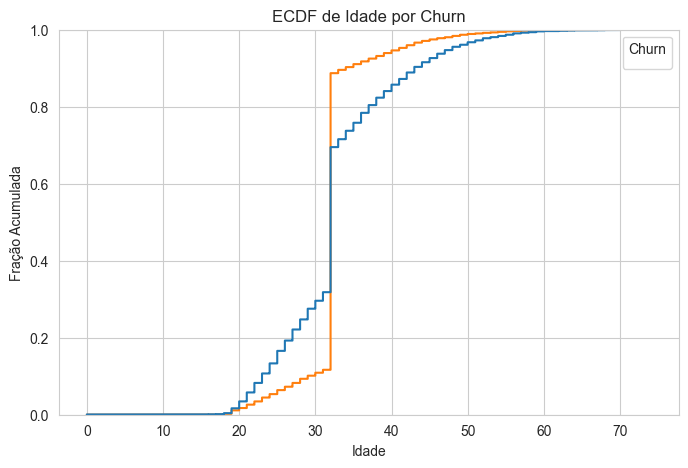

In [13]:
# ECDF (Função de Distribuição Empírica) da idade por churn
plt.figure(figsize=(8,5))
sns.ecdfplot(data=df, x='idade', hue='churn')
plt.xlabel('Idade')
plt.ylabel('Fração Acumulada')
plt.title('ECDF de Idade por Churn')
plt.legend(title='Churn')
plt.show()


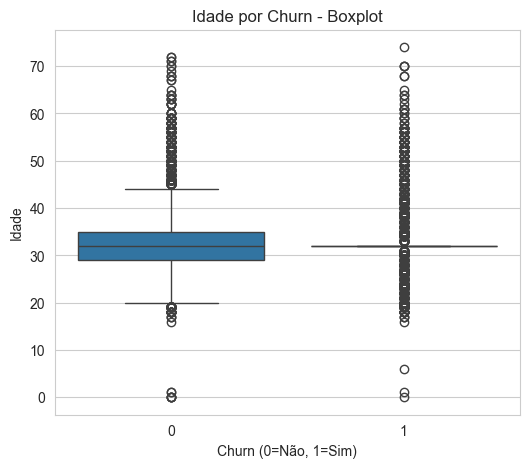

        count       mean       std  min   25%   50%   75%   max
churn                                                          
0      7688.0  32.684703  7.722214  0.0  29.0  32.0  35.0  72.0
1      9323.0  32.217956  4.752704  0.0  32.0  32.0  32.0  74.0


In [14]:
# Boxplot da idade por churn
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='idade', data=df)
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.ylabel('Idade')
plt.title('Idade por Churn - Boxplot')
plt.show()

# Resumo estatístico (idade) por churn
print(df.groupby('churn')['idade'].describe())


C:\Users\arthu\AppData\Local\Temp\ipykernel_18928\3012087698.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100


Taxa de churn por faixa etária (%):
faixa_idade
<=20     38.2
21-30    29.8
31-40    64.4
41-50    32.0
50+      29.2
Name: churn, dtype: float64


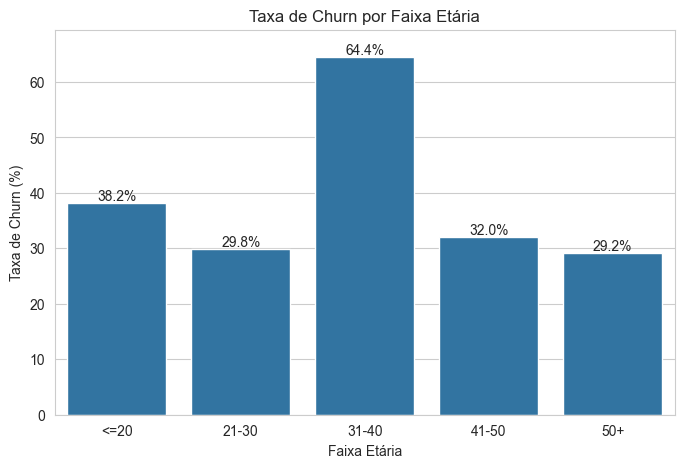

In [15]:
# Criar coluna de faixa etária categorizada
df['faixa_idade'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 100], 
                            labels=['<=20', '21-30', '31-40', '41-50', '50+'], right=True)
# Calcular a taxa de churn (%) para cada faixa etária
rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100
print("Taxa de churn por faixa etária (%):")
print(rate_by_age_group.round(1))

# Gráfico de barras da taxa de churn por faixa etária
age_groups = [grp for grp in ['<=20','21-30','31-40','41-50','50+'] if grp in rate_by_age_group.index]
churn_rates = [rate_by_age_group[grp] for grp in age_groups]
plt.figure(figsize=(8,5))
sns.barplot(x=age_groups, y=churn_rates)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa Etária')
# Adicionar rótulo de porcentagem acima de cada barra
for i, v in enumerate(churn_rates):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.ylim(0, max(churn_rates) + 5)
plt.show()


Taxa de churn por estado (%):
estado
PU               100.0
SP                64.0
PI                62.0
PA                59.8
AM                59.7
AC                59.1
TO                58.2
MA                57.4
MS                56.7
RO                56.7
CE                55.8
SC                55.7
PR                55.4
RS                54.7
MG                54.2
ES                52.9
MT                52.5
BA                51.6
DF                51.4
AP                51.2
GO                51.0
RJ                50.7
PE                48.9
SE                45.3
RR                45.2
AL                43.2
RN                42.9
PB                32.2
Não Informado      0.0
Name: churn, dtype: float64


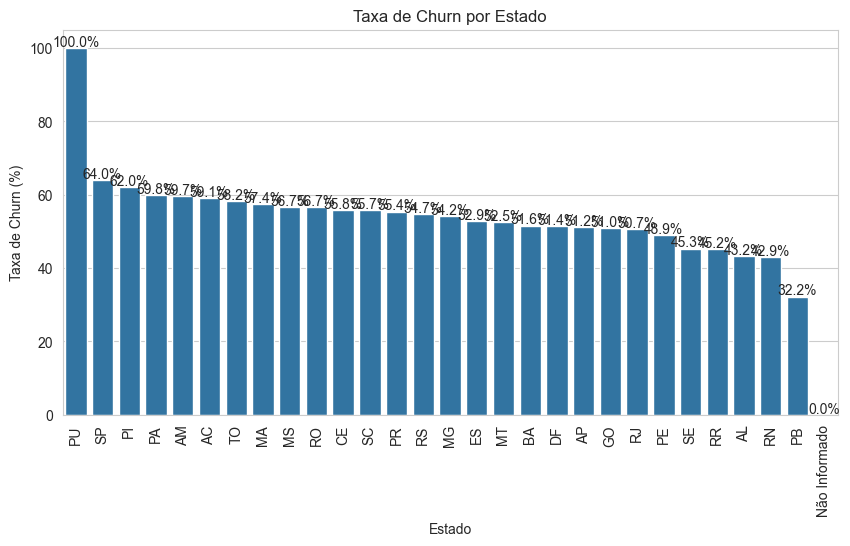

In [16]:
# Taxa de churn (%) por estado (UF)
rate_by_state = df.groupby('estado')['churn'].mean() * 100
rate_by_state = rate_by_state.sort_values(ascending=False)
print("Taxa de churn por estado (%):")
print(rate_by_state.round(1))

plt.figure(figsize=(10,5))
sns.barplot(x=rate_by_state.index, y=rate_by_state.values)
plt.xlabel('Estado')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Estado')
# Adicionar porcentagem acima de cada barra
for i, v in enumerate(rate_by_state.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=90)
plt.show()


C:\Users\arthu\AppData\Local\Temp\ipykernel_18928\3012087698.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100


Taxa de churn por faixa etária (%):
faixa_idade
<=20     38.2
21-30    29.8
31-40    64.4
41-50    32.0
50+      29.2
Name: churn, dtype: float64


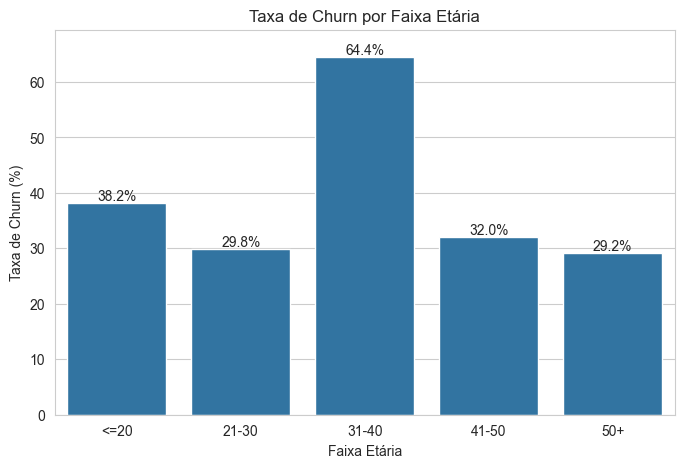

In [21]:
# Criar coluna de faixa etária categorizada
df['faixa_idade'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 100], 
                            labels=['<=20', '21-30', '31-40', '41-50', '50+'], right=True)
# Calcular a taxa de churn (%) para cada faixa etária
rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100
print("Taxa de churn por faixa etária (%):")
print(rate_by_age_group.round(1))

# Gráfico de barras da taxa de churn por faixa etária
age_groups = [grp for grp in ['<=20','21-30','31-40','41-50','50+'] if grp in rate_by_age_group.index]
churn_rates = [rate_by_age_group[grp] for grp in age_groups]
plt.figure(figsize=(8,5))
sns.barplot(x=age_groups, y=churn_rates)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa Etária')
# Adicionar rótulo de porcentagem acima de cada barra
for i, v in enumerate(churn_rates):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.ylim(0, max(churn_rates) + 5)
plt.show()


# Taxa de churn (%) por forma de pagamento
rate_by_payment = df.groupby('forma_pagamento')['churn'].mean() * 100
print("Taxa de churn por forma de pagamento (%):")
print(rate_by_payment.round(1))

plt.figure(figsize=(8,5))
sns.barplot(x=rate_by_payment.index, y=rate_by_payment.values)
plt.xlabel('Forma de Pagamento')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Forma de Pagamento')
# Adicionar porcentagem acima de cada barra
for i, v in enumerate(rate_by_payment.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.show()
